# Demographics figures & Gendar towards management figures

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_76564/967677229.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dataset', y=column_name, data=combined_df, palette='Set2', inner='box', linewidth=1.7)


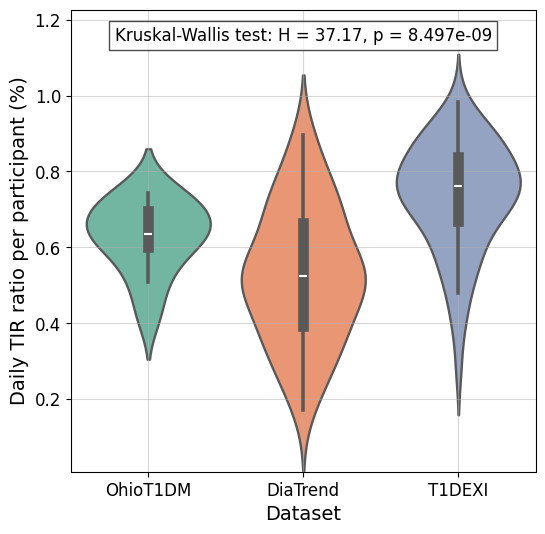

/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_76564/967677229.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dataset', y=column_name, data=combined_df, palette='Set2', inner='box', linewidth=1.7)


Kruskal-Wallis test statistic: 37.1671
p-value: 8.4972e-09
The Daily TIR ratio per participant (%) between the datasets are significantly different.


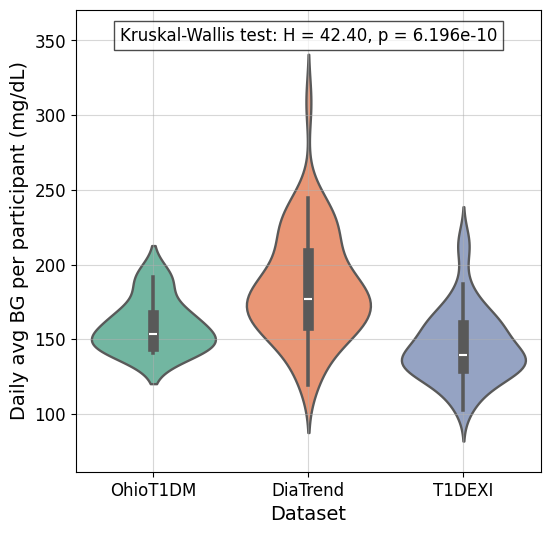

Kruskal-Wallis test statistic: 42.4038
p-value: 6.1962e-10
The Daily avg BG per participant (mg/dL) between the datasets are significantly different.


/var/folders/j5/tbqtlr256g5b8t969rk8d5kr0000gn/T/ipykernel_76564/967677229.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dataset', y=column_name, data=combined_df, palette='Set2', inner='box', linewidth=1.7)


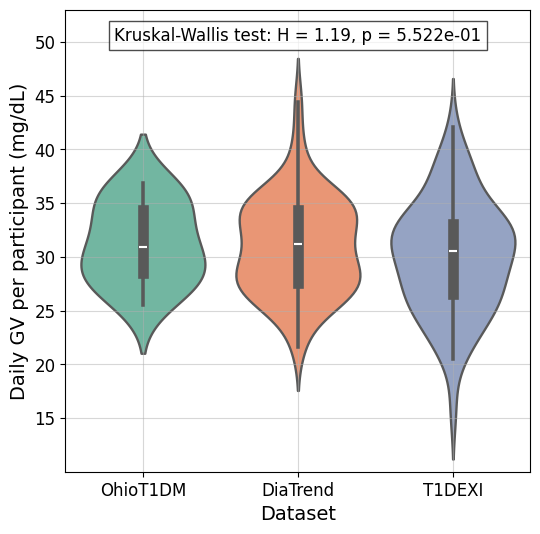

Kruskal-Wallis test statistic: 1.1878
p-value: 5.5216e-01
The Daily GV per participant (mg/dL) between the datasets are NOT significantly different.


In [ ]:
# Load the data
demographics = pd.read_csv('demographics.csv')
# Rename the specified columns
demographics.rename(columns={
    'AVE CGM (daily avg)': 'Daily avg BG per participant (mg/dL)',
    'TIR ratio': 'Daily TIR ratio per participant (%)',
    'Gly var (daily std)': 'Daily GV per participant (mg/dL)'
}, inplace=True)

# Separate the DataFrame into three sub-DataFrames by dataset type
ohio = demographics[demographics['Dataset'] == 'OhioT1DM']
diatrend = demographics[demographics['Dataset'] == 'DiaTrend']
t1dexi = demographics[demographics['Dataset'] == 'T1DEXI']

# Function to create violin plots
def create_violin_plot(column_name):
    # Combine the three DataFrames into one for plotting
    combined_df = pd.concat([
        ohio[[column_name]].assign(Dataset='OhioT1DM'),
        diatrend[[column_name]].assign(Dataset='DiaTrend'),
        t1dexi[[column_name]].assign(Dataset='T1DEXI')
    ])

    # Create a violin plot
    plt.figure(figsize=(6, 6))
    sns.violinplot(x='Dataset', y=column_name, data=combined_df, palette='Set2', inner='box', linewidth=1.7)

    # Add title and labels
    plt.xlabel('Dataset', fontsize=14)
    plt.ylabel(column_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(alpha=0.5)

    # Extract TIR ratio values from each dataset
    tir_ohio = ohio[column_name].dropna()
    tir_diatrend = diatrend[column_name].dropna()
    tir_t1dexi = t1dexi[column_name].dropna()

    # Kruskal-Wallis test (non-parametric)
    stat, p_value = stats.kruskal(tir_ohio, tir_diatrend, tir_t1dexi)

    # Annotate Kruskal-Wallis test result at the top of the figure
    y_max = combined_df[column_name].max()
    y_min = combined_df[column_name].min()
    y_pos = y_max + (y_max - y_min) * 0.2  # Add small offset to keep it within figure
    

    annotation_text = f'Kruskal-Wallis test: H = {stat:.2f}, p = {p_value:.3e}'
    plt.text(1, y_pos, annotation_text, ha='center', fontsize=12, color='black', 
             bbox=dict(facecolor='white', alpha=0.7))

    # Adjust y-limits to ensure the annotation fits within the plot
    plt.ylim(y_min - (y_max - y_min) * 0.2, y_max + (y_max - y_min) * 0.3)

    # Show the plot
    # plt.title(title, fontsize=16)
    plt.show()

    # Print the result
    print(f'Kruskal-Wallis test statistic: {stat:.4f}')
    print(f'p-value: {p_value:.4e}')

    if p_value < 0.05:
        print(f"The {column_name} between the datasets are significantly different.")
    else:
        print(f"The {column_name} between the datasets are NOT significantly different.")


# Create violin plots for the specified columns
create_violin_plot('Daily TIR ratio per participant (%)')
create_violin_plot('Daily avg BG per participant (mg/dL)')
create_violin_plot('Daily GV per participant (mg/dL)')